In [1]:
""" pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 torchaudio==0.9.0 -f https://download.pytorch.org/whl/torch_stable.html
pip install diffusers==0.11.1
pip install transformers scipy ftfy accelerate """
import re
import torch
""" from diffusers import StableDiffusionPipeline, StableDiffusionImageVariationPipeline """
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
from matplotlib import pyplot as plt
from PIL import Image
from torchvision import transforms
from numba import cuda
import os
""" import tensorflow as tf
import tensorflow_hub as hub # pip install --upgrade tensorflow-hub
import requests
import numpy as np
from typing import Generator, Iterable, List, Optional
import mediapy as media #3 pip install mediapy """


""" pipe.enable_attention_slicing() """

""" device = "cuda:0"
sd_pipe = StableDiffusionImageVariationPipeline.from_pretrained(
  "lambdalabs/sd-image-variations-diffusers",
  revision="v2.0",
  )
sd_pipe = sd_pipe.to(device) """

EXTERNAL =  True


if EXTERNAL:
  %store -r WIDTH
  %store -r HEIGHT
  %store -r TEXT_IMAGE_GEN  
  %store -r SAVE_FOLDER
  %store -r PROJECT_NAME
  %store -r SHOW_OUTPUT
  %store -r IMG_NUMBER
  %store -r EXCLUDE_IMG_GEN
  %store -r PROMPT_IMG
  %store -r TEXT_VOICE_GEN
  %store -r NEGATIVE_P
  %store -r MODEL_14
  %store -r RECORD_VIDEO_AFTER
else:
  RECORD_VIDEO_AFTER = 0
  WIDTH = 768
  HEIGHT = 768
  SAVE_FOLDER = "D:\\Deletar\\p_gen"
  PROJECT_NAME = "THE FELLOWSHIP OF THE RING"
  SHOW_OUTPUT = True
  IMG_NUMBER = 2
  EXCLUDE_IMG_GEN = []
  PROMPT_IMG = "((((beautiful))),: "
  TEXT_IMAGE_GEN = ['One punch man agains goku.', 'Vegeta against Freeza']
  TEXT_VOICE_GEN = ['a', "b"]
  MODEL_14 = False
  NEGATIVE_P = "ugly, morbid, cloned face, missing legs, tiling, extra fingers, mutation, bad anatomy,gross proportions, \
   missing arm, long neck, duplicate, poorly drawn hands, poorly drawn feet, poorly drawn face, out of frame, extra limbs, \
   disfigured, deformed, body out of frame, blurry, blurred, watermark, grainy, signature, cut off, draft, "


if MODEL_14:
  # stable diffusion 1.4
  print('1.4')
  pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)
  pipe = pipe.to("cuda")
  pipe.set_use_memory_efficient_attention_xformers(True)
  # pipe.safety_checker = lambda images, clip_input: (images, False) #disable black
else:
  # stable diffusion 2.1
  model_id = "stabilityai/stable-diffusion-2-1"
  pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
  pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
  pipe = pipe.to("cuda")

  pipe.set_use_memory_efficient_attention_xformers(True)


saved_folder = os.path.exists(SAVE_FOLDER)
if (not saved_folder):
  os.makedirs(saved_folder)


project_folder = f"{SAVE_FOLDER}\\{PROJECT_NAME}"

saved_project_folder = os.path.exists(project_folder)
if (not saved_project_folder):
  os.makedirs(project_folder)


    
torch.cuda.is_available()

A matching Triton is not available, some optimizations will not be enabled.
Error caught was: No module named 'triton'
text_encoder\model.safetensors not found


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

True

In [2]:
def generate_img(word, width, height, num_inference_steps, negative_prompt = ""):
    img = False
    """ img = pipe(word) """
    while img is False:  #diffusion 1.4
        if MODEL_14:
            img = pipe(word, width=width, height=height, num_inference_steps=num_inference_steps)
            if img.nsfw_content_detected[0] == True: 
                img = False  # image here is in [PIL format](https://pillow.readthedocs.io/en/stable/)                
        else:        
            img = pipe(word, width=width, height=height, num_inference_steps=num_inference_steps, negative_prompt = negative_prompt )        
            if img.nsfw_content_detected == True: #diffusion 2.1
                img = False  # image here is in [PIL format](https://pillow.readthedocs.io/en/stable/)   
    return img.images[0]

""" def generate_img_variants(im):
    tform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(
        (224, 224),
        interpolation=transforms.InterpolationMode.BICUBIC,
        antialias=False,
        ),
    transforms.Normalize(
      [0.48145466, 0.4578275, 0.40821073],
      [0.26862954, 0.26130258, 0.27577711]),
])
    inp = tform(im).to(device).unsqueeze(0)

    out = sd_pipe(inp, guidance_scale=3)
    return out["images"][0] """

""" def read_txt(txt):
    text_splited = []
    text_split = txt.split(".")
    for i in text_split:
        if i != "":
            text_splited.append(i + ".")
    return text_splited """

""" def read_txt(txt):
    text_splited = []
    text_split = " ".join(txt.split()).split(".")
    first = text_split[0]
    temp_str = ""    
    
    for i in reversed(text_split):        
        if i == first:            
            text_splited.append(PROMPT_IMG +  i + temp_str + ".")
        elif(i != " " and i != ""):            
            if(i[0].startswith(" ")):
                temp = i + temp_str + "."
                temp = temp[1:]       
                text_splited.append(PROMPT_IMG + temp)
                temp_str = ""
            else:                
                temp_str = i + temp_str 
    return reversed(text_splited) """


' def read_txt(txt):\n    text_splited = []\n    text_split = " ".join(txt.split()).split(".")\n    first = text_split[0]\n    temp_str = ""    \n    \n    for i in reversed(text_split):        \n        if i == first:            \n            text_splited.append(PROMPT_IMG +  i + temp_str + ".")\n        elif(i != " " and i != ""):            \n            if(i[0].startswith(" ")):\n                temp = i + temp_str + "."\n                temp = temp[1:]       \n                text_splited.append(PROMPT_IMG + temp)\n                temp_str = ""\n            else:                \n                temp_str = i + temp_str \n    return reversed(text_splited) '

  0%|          | 0/30 [00:00<?, ?it/s]

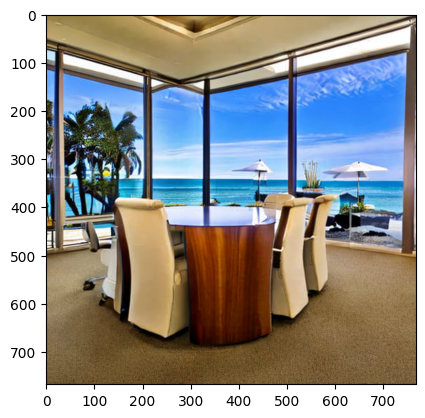

  0%|          | 0/30 [00:00<?, ?it/s]

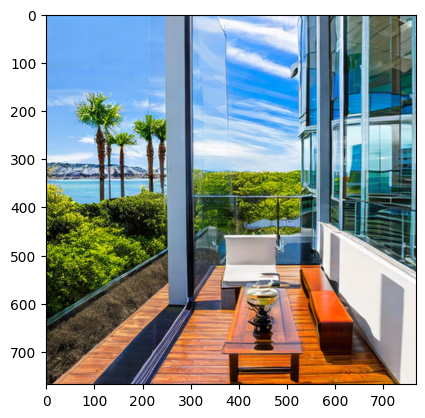

  0%|          | 0/30 [00:00<?, ?it/s]

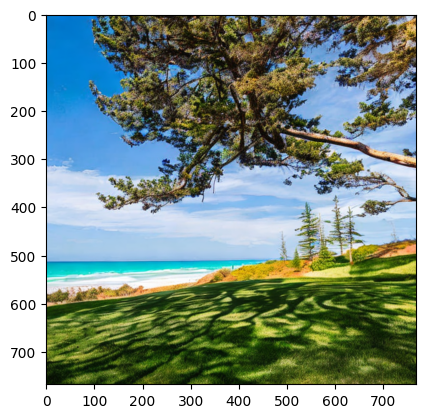

  0%|          | 0/30 [00:00<?, ?it/s]

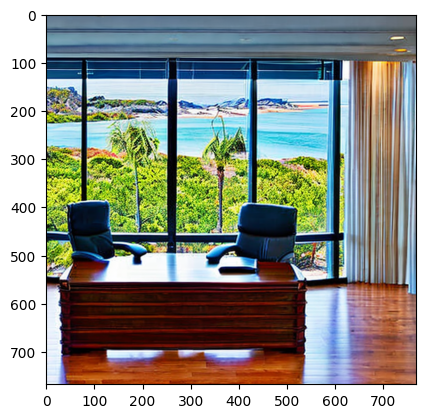

  0%|          | 0/30 [00:00<?, ?it/s]

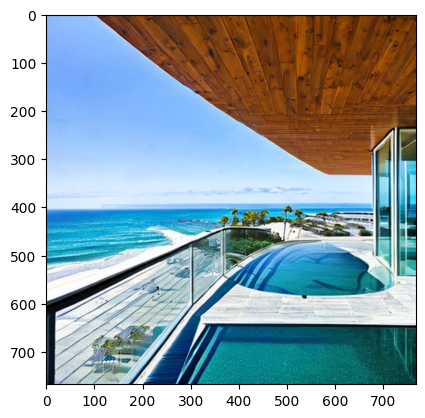

  0%|          | 0/30 [00:00<?, ?it/s]

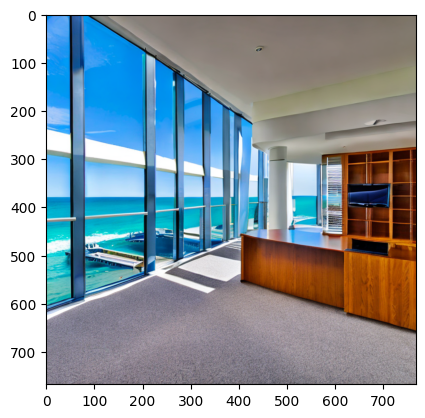

  0%|          | 0/30 [00:00<?, ?it/s]

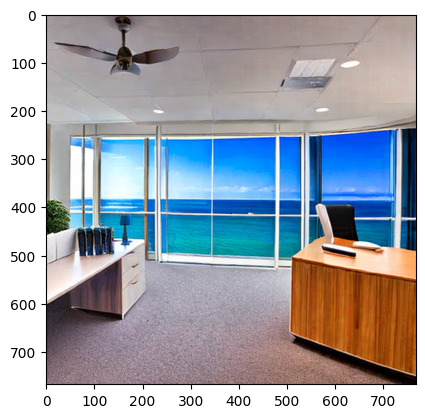

  0%|          | 0/30 [00:00<?, ?it/s]

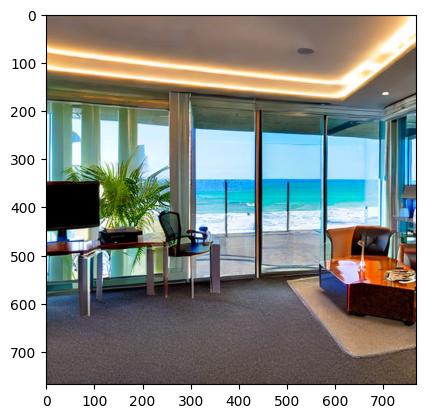

  0%|          | 0/30 [00:00<?, ?it/s]

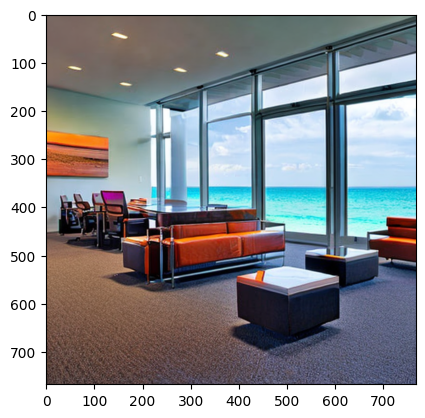

  0%|          | 0/30 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [3]:
if(EXTERNAL == True): 
    """ splited_text = read_txt(TEXT) """
    """ for index, name_index in enumerate(TEXT_IMAGE_GEN): """
    for index in TEXT_IMAGE_GEN:
        
        if int(index) not in EXCLUDE_IMG_GEN and int(index) > RECORD_VIDEO_AFTER:             
            if (SHOW_OUTPUT):
                print(f"text: {TEXT_VOICE_GEN[index]}")
                print(f"prompt: {TEXT_IMAGE_GEN[index]}")                
                print(f"index: {index}")      
            if (not os.path.exists(f"{project_folder}\\img\\{int(index):07d}")):
                os.makedirs(f"{project_folder}\\img\\{int(index):07d}")
            temp_txt_file = my_new_string = re.sub('[^a-zA-Z0-9 \n\.]', '', TEXT_VOICE_GEN[index])
            with open(f"{project_folder}\\img\\{int(index):07d}\\{temp_txt_file}.txt", 'w') as f:
                f.write('Create a new text file!')    
            for i in range(IMG_NUMBER):
                z = generate_img(PROMPT_IMG + TEXT_IMAGE_GEN[index], WIDTH, HEIGHT, 40, NEGATIVE_P)        
                z.save(f"{project_folder}\\img\\{int(index):07d}\\{i:05d}.jpg")          
                if(i == IMG_NUMBER -1 and SHOW_OUTPUT):
                    plt.imshow(z)        
                    plt.show()
else:
    """ splited_text = PROMPT_IMG + "(((young female adult))), (((front face view))), (((realistic))), (((digital art))), gorgeous, \
    high definition, spectacular, splendid, superb, wonderful, grand,\
    impressive, awesome, astounding, astonishing, amazing, stunning"  """
    # splited_text = "professional colorful photo headshot of a cute young woman with the face centered with the photo, with a simmetrical face, with a blank expression wearing a collar shirt"   
    splited_text = "professional colorful photo headshot of a beautiful young woman with the face centered with the photo, front face view, simmetrical face, blank expression wearing a suit"   
    splited_text = "professional colorful photo of an impressive office, beautiful, modern, beach view, detailed, high definition"
    NEGATIVE_P = "side view of face, cropped, part of face, smiling, ugly, tiling, poorly drawn hands, poorly drawn feet, poorly drawn face, out of frame, extra limbs, disfigured, deformed, body out of frame, blurry, bad anatomy, blurred, watermark, grainy, signature, cut off, draft"
    for i in range(1000):
        z = generate_img(splited_text, 768, 768, 30, NEGATIVE_P )        
        z.save(f".\\random\\{i}.jpg")
        plt.imshow(z)        
        plt.show()


""" cuda.select_device(0)
cuda.close()  """
